# Fuzzy project
# Sugeno-Yasukawa modeling for sinc function
# Sajad Hosseini Najafabadi - 400301997
# --------------------------------------------------------

In [1]:
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tabulate import tabulate
from scipy.optimize import curve_fit

## Generating data:

In [2]:
m = 200 # Number of data samples
# Generating data in [-5, 5] interval for inputs => x1 and x2 are effective inputs:
x1 = np.random.default_rng(seed=1).uniform(low=-5, high=5, size=(m,))
x2 = np.random.default_rng(seed=2).uniform(low=-5, high=5, size=(m,))

# Generating 2 dummy inputs:
x3 = np.random.default_rng(seed=3).uniform(low=-5, high=5, size=(m,))
x4 = np.random.default_rng(seed=4).uniform(low=-5, high=5, size=(m,))

# Generating white gaussian noise with zero mean and standard deviation of 1:
noise_gaussian = np.random.default_rng(seed=0).normal(0,1,m)

# Defining sinc function:
def sinc(x1, x2, noise=False):
    r = np.sqrt(x1**2 + x2**2)
    if noise:
        y = np.sinc(r/5) + noise_gaussian
    else:
        y = np.sinc(r/5)
    return y

## Finding the best number of clusters:

### In the orginal paper, the following criterion is used to calculate the number of suitable clusters:

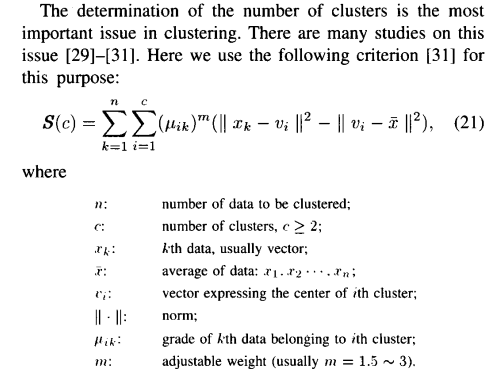

### But I decided to use the partition_entropy_coefficient (PEC) metric:
### Source: https://fuzzy-c-means.readthedocs.io/en/latest/examples/02%20-%20Clustering%20validation/

In [46]:
y = sinc(x1, x2, noise = True)

patient = 4
save_pec = 10**10
save_c = 0
for c in range(2,30):
    fcm = FCM(n_clusters = c)
    fcm.fit(y[:, None])
    pec = fcm.partition_entropy_coefficient
    if abs(pec - save_pec) > 0.03:
        save_pec = pec
        save_c = c
        patient = 5
    else:
        save_pec = pec
        patient -= 1
    if patient == 0:
        break
        
# load saved_c
c = save_c
fcm = FCM(n_clusters = c)
fcm.fit(y[:, None])

print(f'The best number of clusters based on partition_entropy_coefficient is: {c}')

The best number of clusters based on partition_entropy_coefficient is: 4


### For the sinc function, the proper number of clusters is 4. Remember that it was 3 for saddel funcrion. But in order to have the same conditions for comparison, we consider the same 3 clusters.

### Show center of clusters on output data:

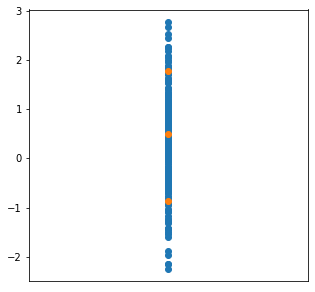

In [47]:
c = 3
fcm = FCM(n_clusters = c)
fcm.fit(y[:, None])
plt.figure(figsize=(5,5))
plt.xticks([])
plt.scatter(np.zeros(len(y)), y)
plt.scatter(np.zeros(len(fcm.centers)), fcm.centers)

### Preapering data for group method of data handling (GMDG):

In [60]:
ds = np.concatenate((x1[:, None], x2[:, None], x3[:, None], x4[:, None], y[:, None]), axis = 1)
ds1, ds2 = train_test_split(ds, test_size = 0.5, random_state = 0)
x11, x12, x13, x14, y1 = [ds1[:,i] for i in range(5)]
x21, x22, x23, x24, y2 = [ds2[:,i] for i in range(5)]

### Output clustering using FCM:

In [61]:
fcm1 = FCM(n_clusters = c)
fcm1.fit(y1[:, None])
c0 = (abs(fcm1.centers) < 0.8).argmax()
c1 = (fcm1.centers > 0.8).argmax()
c2 = (fcm1.centers < -0.8).argmax()
fcm1_centers = fcm1.centers[[c0, c1, c2]]
fcm1_mu = fcm1.u[:, [c0, c1, c2]]

fcm2 = FCM(n_clusters = c)
fcm2.fit(y2[:, None])
c0 = (abs(fcm2.centers) < 0.8).argmax()
c1 = (fcm2.centers > 0.8).argmax()
c2 = (fcm2.centers < -0.8).argmax()
fcm2_centers = fcm2.centers[[c0, c1, c2]]
fcm2_mu = fcm2.u[:, [c0, c1, c2]]

### Show clustering table for the first 10 sample of output:

In [62]:
l=[[f'y10 = {y1[0]:.2f}'],[f'y11 = {y1[1]:.2f}'],[f'y12 = {y1[2]:.2f}'],[f'y13 = {y1[3]:.2f}'],[f'y14 = {y1[4]:.2f}'],
   [f'y15 = {y1[5]:.2f}'],[f'y16 = {y1[6]:.2f}'],[f'y17 = {y1[7]:.2f}'],[f'y18 = {y1[8]:.2f}'],[f'y19 = {y1[9]:.2f}']]
l = np.append(l, fcm1_mu[:10].tolist(), axis=1)
table = tabulate(l, headers=['y1','c0','c1', 'c2'], tablefmt='grid', stralign="center")
print(table)

l=[[f'y20 = {y2[0]:.2f}'],[f'y21 = {y2[1]:.2f}'],[f'y22 = {y2[2]:.2f}'],[f'y23 = {y2[3]:.2f}'],[f'y24 = {y2[4]:.2f}'],
   [f'y25 = {y2[5]:.2f}'],[f'y26 = {y2[6]:.2f}'],[f'y27 = {y2[7]:.2f}'],[f'y28 = {y2[8]:.2f}'],[f'y29 = {y2[9]:.2f}']]
l = np.append(l, fcm2_mu[:10].tolist(), axis=1)
table = tabulate(l, headers=['y2','c0','c1', 'c2'], tablefmt='grid', stralign="center")
print(table)

+-------------+------------+------------+-------------+
|     y1      |         c0 |         c1 |          c2 |
+=============+============+============+=============+
| y10 = -0.67 | 0.0142662  | 0.00351979 | 0.982214    |
+-------------+------------+------------+-------------+
| y11 = -0.71 | 0.00776191 | 0.00197127 | 0.990267    |
+-------------+------------+------------+-------------+
| y12 = 0.94  | 0.791995   | 0.168904   | 0.0391012   |
+-------------+------------+------------+-------------+
| y13 = 0.79  | 0.921675   | 0.0568885  | 0.0214363   |
+-------------+------------+------------+-------------+
| y14 = 0.86  | 0.871526   | 0.098529   | 0.0299445   |
+-------------+------------+------------+-------------+
| y15 = -0.58 | 0.0424469  | 0.00966546 | 0.947888    |
+-------------+------------+------------+-------------+
| y16 = 1.88  | 0.00572761 | 0.992871   | 0.00140108  |
+-------------+------------+------------+-------------+
| y17 = 0.19  | 0.851143   | 0.0426986  | 0.1061

### Visualizing the clusters for y1:

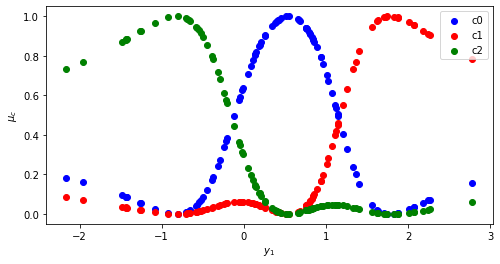

In [63]:
plt.figure(figsize=(8,4))
plt.xlabel('$y_1$')
plt.ylabel('$\mu_{c}$')
plt.scatter(y1, fcm1_mu[:,0], color = 'b')
plt.scatter(y1, fcm1_mu[:,1], color = 'r')
plt.scatter(y1, fcm1_mu[:,2], color = 'g')
plt.legend(['c0','c1', 'c2'])

### Interesting! They are like the negative, zero, and positive linguistic variables.
### Their shape is similar to the Gaussian and Sigmoid functions. Therefore, we need to fit one Gaussian and two Sigmoid membership functions to them:

In [64]:
def Gaussian(x, a, b, c, d):
    y = d + a * np.exp(-b*(x-c)**2)
    return y

def sigmoid(x, a, b, c):
    y = a / (1 + np.exp(-b*(x-c)))
    return y

In [65]:
# c1:
p, _ = curve_fit(Gaussian, y1, fcm1_mu[:,0], p0=[1,0,0,0])
def c0_y1(x, a = p[0], b = p[1], c = p[2], d=p[3]):
    mu = Gaussian(x, a, b, c, d)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

# c2:
p, _ = curve_fit(sigmoid, y1, fcm1_mu[:,1])
def c1_y1(x, a = p[0], b = p[1], c = p[2]):
    mu = sigmoid(x, a, b, c)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

# c3:
p, _ = curve_fit(sigmoid, y1, fcm1_mu[:,2])
def c2_y1(x, a = p[0], b = p[1], c = p[2]):
    mu = sigmoid(x, a, b, c)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

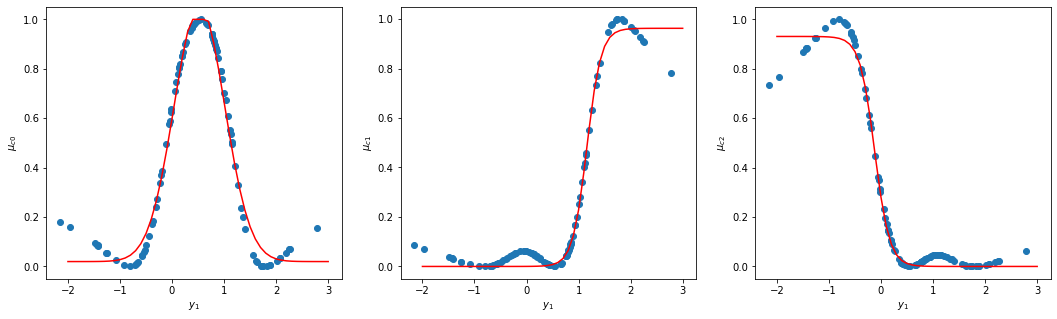

In [69]:
interval = np.arange(-2,3.1, 0.1)

plt.figure(figsize=[18,5])
plt.subplot(1,3,1)
plt.xlabel('$y_1$')
plt.ylabel('$\mu_{c0}$')
plt.scatter(y1, fcm1_mu[:,0])
plt.plot(interval, c0_y1(interval), color='r')

plt.subplot(1,3,2)
plt.xlabel('$y_1$')
plt.ylabel('$\mu_{c1}$')
plt.scatter(y1, fcm1_mu[:,1])
plt.plot(interval, c1_y1(interval), color='r')

plt.subplot(1,3,3)
plt.xlabel('$y_1$')
plt.ylabel('$\mu_{c2}$')
plt.scatter(y1, fcm1_mu[:,2])
plt.plot(interval, c2_y1(interval), color='r')

### Now, we need to map the output membership values to the input spaces. For example, if we map c1 to the x11, we have:

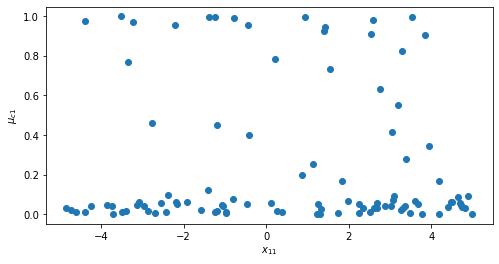

In [73]:
plt.figure(figsize=(8,4))
plt.xlabel('$x_{11}$')
plt.ylabel('$\mu_{c1}$')
plt.scatter(x11, fcm1_mu[:,1])

### As we can see, the result is not as uniform as outputs. But this was also discussed in class and there is nothing new! This is what it is when we map the membership function from the output into the input space. This issue is also mentioned in the original paper:

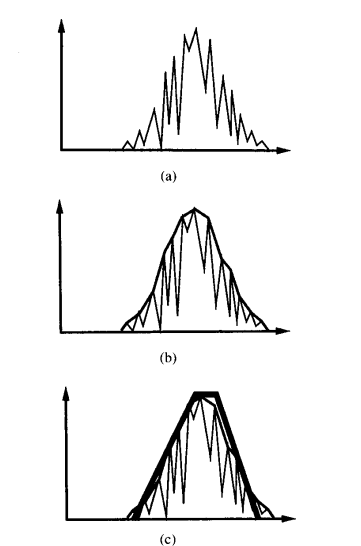


### Now we need to fit a smooth function to input membership values. This is done using the following algorithm in the original paper:

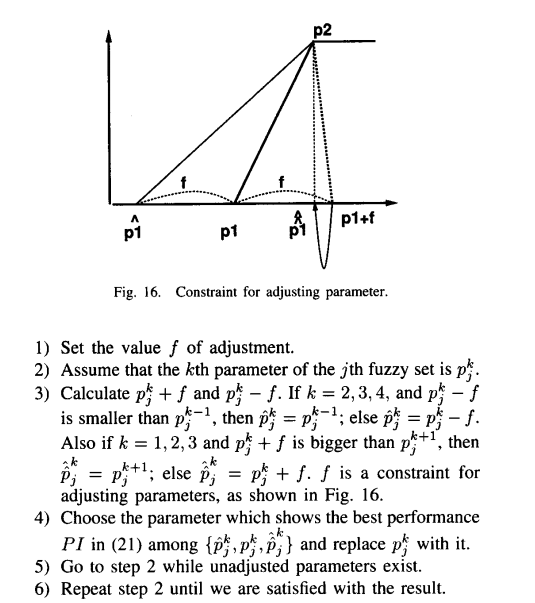

### But I decided to use the same curve_fit as it was done for the output.


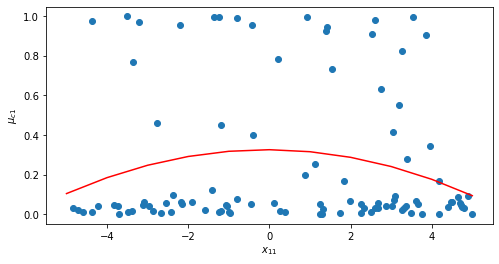

In [74]:
p, _ = curve_fit(Gaussian, x11, fcm1_mu[:,1])

def c1_x11(x, a = p[0], b = p[1], c = p[2], d=p[3]):
    mu = Gaussian(x, a, b, c, d)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

plt.figure(figsize=(8,4))
plt.xlabel('$x_{11}$')
plt.ylabel('$\mu_{c1}$')
plt.scatter(x11, fcm1_mu[:,1])
plt.plot(np.arange(-5,6), c1_x11(np.arange(-5,6)), color='r')

### Now we can have fuzzy rules like below:
### If x11 is $\mu_{c1}$ then y is $\mu_{c1}$ , i.e.,
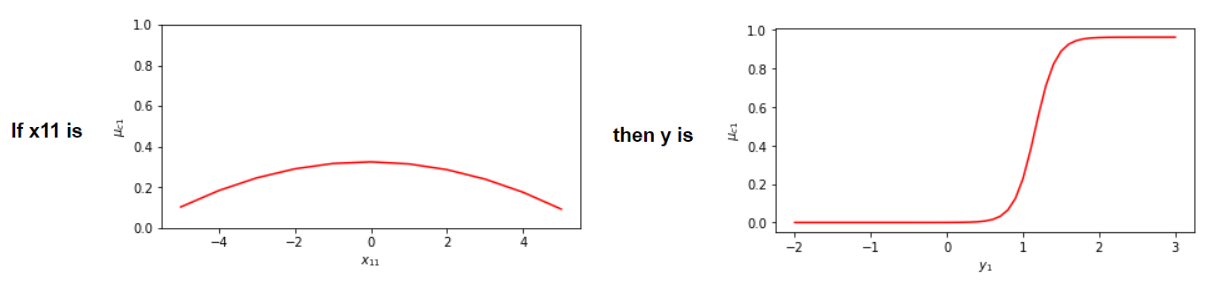

## The rest of the work is similar to what has been done so far:

In [80]:
p, _ = curve_fit(Gaussian, x11, fcm1_mu[:,0])

def c0_x11(x, a = p[0], b = p[1], c = p[2], d=p[3]):
    mu = Gaussian(x, a, b, c, d)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

p, _ = curve_fit(Gaussian, x11, fcm1_mu[:,2])

def c2_x11(x, a = p[0], b = p[1], c = p[2], d=p[3]):
    mu = Gaussian(x, a, b, c, d)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

p, _ = curve_fit(Gaussian, x12, fcm1_mu[:,0])

def c0_x12(x, a = p[0], b = p[1], c = p[2], d=p[3]):
    mu = Gaussian(x, a, b, c, d)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

p, _ = curve_fit(Gaussian, x12, fcm1_mu[:,1])

def c1_x12(x, a = p[0], b = p[1], c = p[2], d=p[3]):
    mu = Gaussian(x, a, b, c, d)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

p, _ = curve_fit(Gaussian, x12, fcm1_mu[:,2], p0=[-4,0,0,3])

def c2_x12(x, a = p[0], b = p[1], c = p[2], d=p[3]):
    mu = Gaussian(x, a, b, c, d)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

p, _ = curve_fit(Gaussian, x13, fcm1_mu[:,0])

def c0_x13(x, a = p[0], b = p[1], c = p[2], d=p[3]):
    mu = Gaussian(x, a, b, c, d)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

p, _ = curve_fit(Gaussian, x13, fcm1_mu[:,1])

def c1_x13(x, a = p[0], b = p[1], c = p[2], d=p[3]):
    mu = Gaussian(x, a, b, c, d)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

p, _ = curve_fit(Gaussian, x13, fcm1_mu[:,2])

def c2_x13(x, a = p[0], b = p[1], c = p[2], d=p[3]):
    mu = Gaussian(x, a, b, c, d)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

p, _ = curve_fit(Gaussian, x14, fcm1_mu[:,0])

def c0_x14(x, a = p[0], b = p[1], c = p[2], d=p[3]):
    mu = Gaussian(x, a, b, c, d)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

p, _ = curve_fit(Gaussian, x14, fcm1_mu[:,1])

def c1_x14(x, a = p[0], b = p[1], c = p[2], d=p[3]):
    mu = Gaussian(x, a, b, c, d)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

p, _ = curve_fit(Gaussian, x14, fcm1_mu[:,2])

def c2_x14(x, a = p[0], b = p[1], c = p[2], d=p[3]):
    mu = Gaussian(x, a, b, c, d)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

### 2nd table:

In [81]:
# 2nd table

# c1:
p, _ = curve_fit(Gaussian, y2, fcm2_mu[:,0], p0=[1,0,0,0])
def c0_y2(x, a = p[0], b = p[1], c = p[2], d=p[3]):
    mu = Gaussian(x, a, b, c, d)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

# c2:
p, _ = curve_fit(sigmoid, y2, fcm2_mu[:,1])
def c1_y2(x, a = p[0], b = p[1], c = p[2]):
    mu = sigmoid(x, a, b, c)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

# c3:
p, _ = curve_fit(sigmoid, y2, fcm2_mu[:,2])
def c2_y2(x, a = p[0], b = p[1], c = p[2]):
    mu = sigmoid(x, a, b, c)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

p, _ = curve_fit(Gaussian, x21, fcm2_mu[:,0])

def c0_x21(x, a = p[0], b = p[1], c = p[2], d=p[3]):
    mu = Gaussian(x, a, b, c, d)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

p, _ = curve_fit(Gaussian, x21, fcm2_mu[:,1])

def c1_x21(x, a = p[0], b = p[1], c = p[2], d=p[3]):
    mu = Gaussian(x, a, b, c, d)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

p, _ = curve_fit(Gaussian, x21, fcm2_mu[:,2])

def c2_x21(x, a = p[0], b = p[1], c = p[2], d=p[3]):
    mu = Gaussian(x, a, b, c, d)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

p, _ = curve_fit(Gaussian, x22, fcm2_mu[:,0], p0=[1,5,-2,0.5])

def c0_x22(x, a = p[0], b = p[1], c = p[2], d=p[3]):
    mu = Gaussian(x, a, b, c, d)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

p, _ = curve_fit(Gaussian, x22, fcm2_mu[:,1])

def c1_x22(x, a = p[0], b = p[1], c = p[2], d=p[3]):
    mu = Gaussian(x, a, b, c, d)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

p, _ = curve_fit(Gaussian, x22, fcm2_mu[:,2])

def c2_x22(x, a = p[0], b = p[1], c = p[2], d=p[3]):
    mu = Gaussian(x, a, b, c, d)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

p, _ = curve_fit(Gaussian, x23, fcm2_mu[:,0])

def c0_x23(x, a = p[0], b = p[1], c = p[2], d=p[3]):
    mu = Gaussian(x, a, b, c, d)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

p, _ = curve_fit(Gaussian, x23, fcm2_mu[:,1])

def c1_x23(x, a = p[0], b = p[1], c = p[2], d=p[3]):
    mu = Gaussian(x, a, b, c, d)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

p, _ = curve_fit(Gaussian, x23, fcm2_mu[:,2])

def c2_x23(x, a = p[0], b = p[1], c = p[2], d=p[3]):
    mu = Gaussian(x, a, b, c, d)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

p, _ = curve_fit(Gaussian, x24, fcm2_mu[:,0])

def c0_x24(x, a = p[0], b = p[1], c = p[2], d=p[3]):
    mu = Gaussian(x, a, b, c, d)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

p, _ = curve_fit(Gaussian, x24, fcm2_mu[:,1])

def c1_x24(x, a = p[0], b = p[1], c = p[2], d=p[3]):
    mu = Gaussian(x, a, b, c, d)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

p, _ = curve_fit(Gaussian, x24, fcm2_mu[:,2])

def c2_x24(x, a = p[0], b = p[1], c = p[2], d=p[3]):
    mu = Gaussian(x, a, b, c, d)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

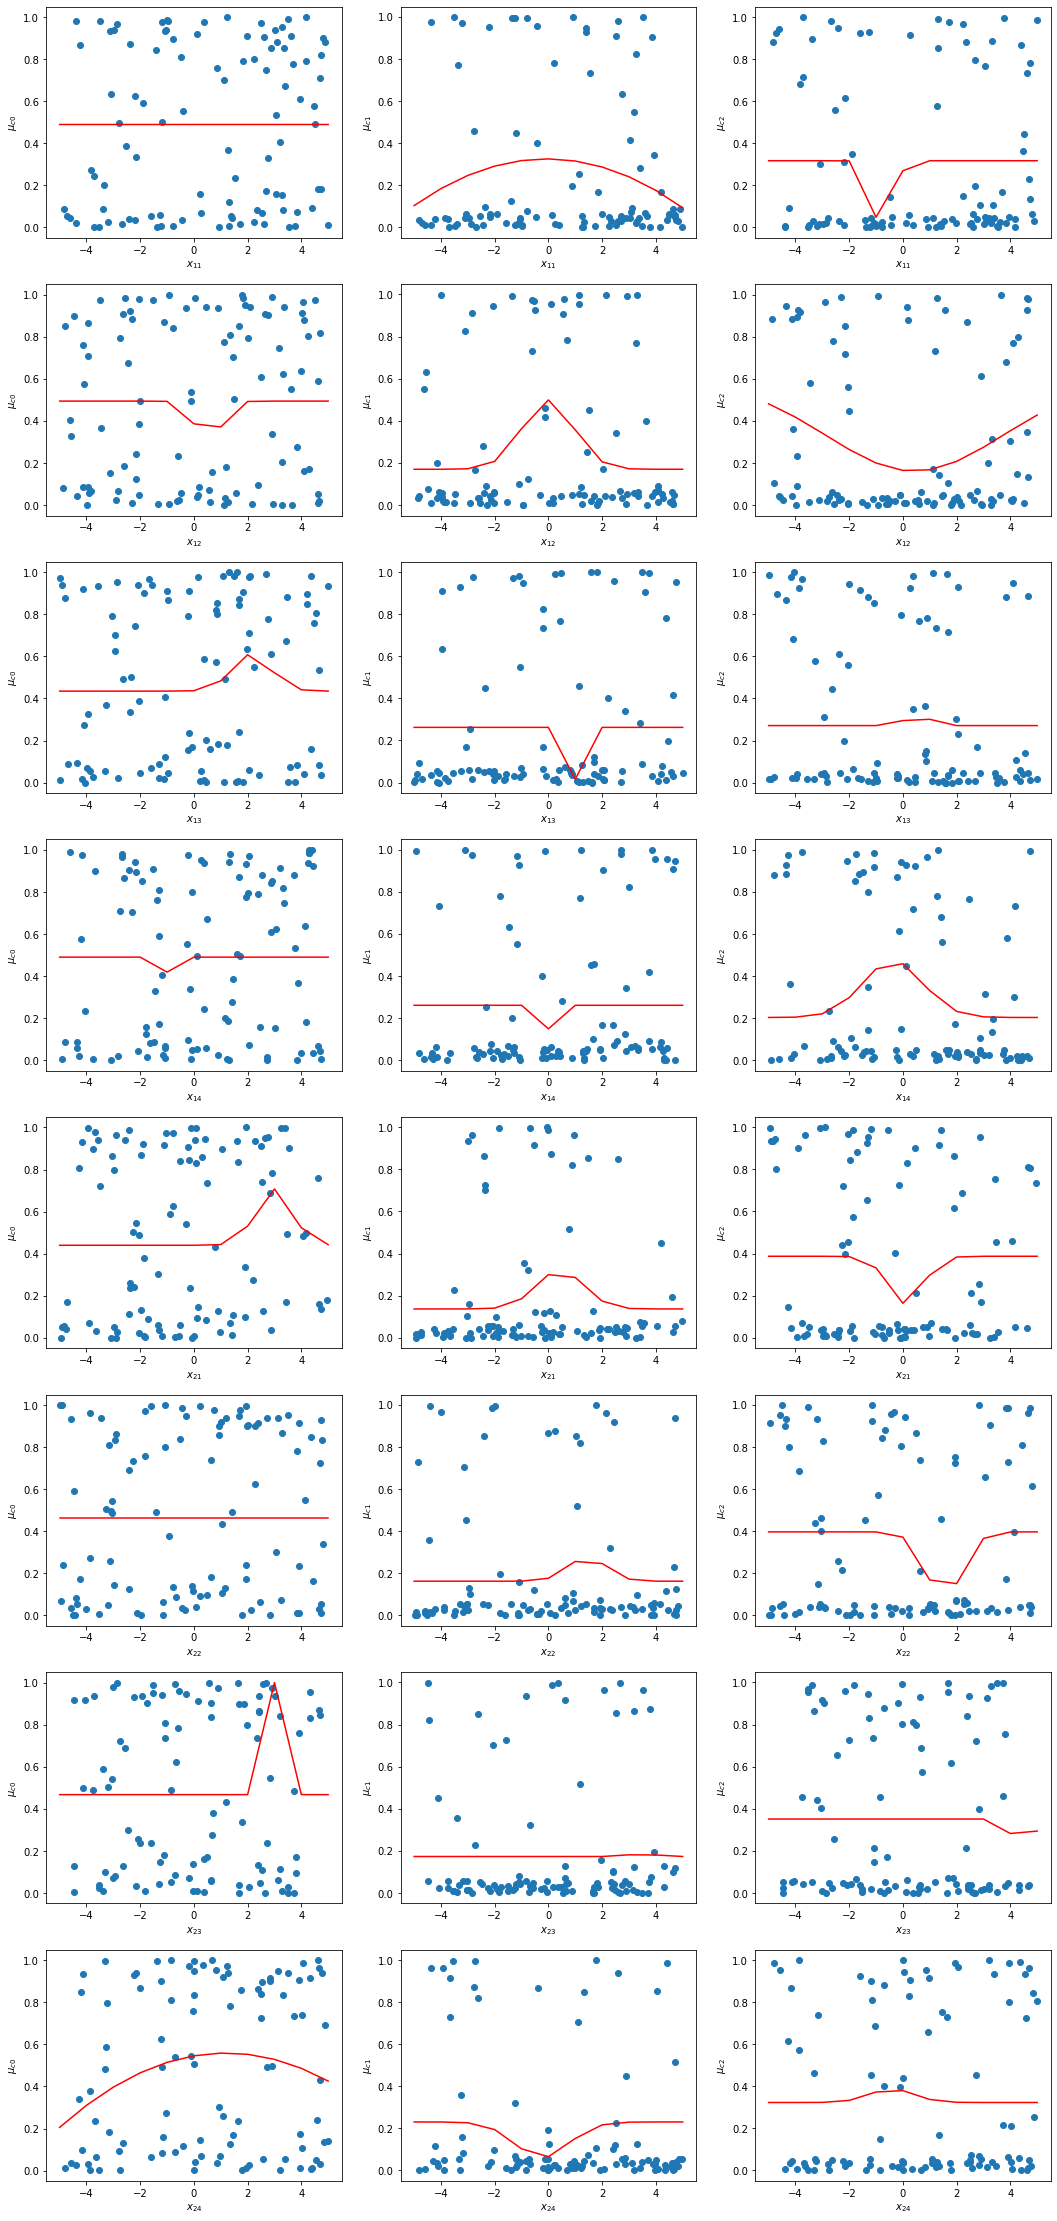

In [82]:
plt.figure(figsize=[18,40])

plt.subplot(8,3,1)
plt.xlabel('$x_{11}$')
plt.ylabel('$\mu_{c0}$')
plt.scatter(x11, fcm1_mu[:,0])
plt.plot(np.arange(-5,6), c0_x11(np.arange(-5,6)), color='r')

plt.subplot(8,3,2)
plt.xlabel('$x_{11}$')
plt.ylabel('$\mu_{c1}$')
plt.scatter(x11, fcm1_mu[:,1])
plt.plot(np.arange(-5,6), c1_x11(np.arange(-5,6)), color='r')

plt.subplot(8,3,3)
plt.xlabel('$x_{11}$')
plt.ylabel('$\mu_{c2}$')
plt.scatter(x11, fcm1_mu[:,2])
plt.plot(np.arange(-5,6), c2_x11(np.arange(-5,6)), color='r')

plt.subplot(8,3,4)
plt.xlabel('$x_{12}$')
plt.ylabel('$\mu_{c0}$')
plt.scatter(x12, fcm1_mu[:,0])
plt.plot(np.arange(-5,6), c0_x12(np.arange(-5,6)), color='r')

plt.subplot(8,3,5)
plt.xlabel('$x_{12}$')
plt.ylabel('$\mu_{c1}$')
plt.scatter(x12, fcm1_mu[:,1])
plt.plot(np.arange(-5,6), c1_x12(np.arange(-5,6)), color='r')

plt.subplot(8,3,6)
plt.xlabel('$x_{12}$')
plt.ylabel('$\mu_{c2}$')
plt.scatter(x12, fcm1_mu[:,2])
plt.plot(np.arange(-5,6), c2_x12(np.arange(-5,6)), color='r')

plt.subplot(8,3,7)
plt.xlabel('$x_{13}$')
plt.ylabel('$\mu_{c0}$')
plt.scatter(x13, fcm1_mu[:,0])
plt.plot(np.arange(-5,6), c0_x13(np.arange(-5,6)), color='r')

plt.subplot(8,3,8)
plt.xlabel('$x_{13}$')
plt.ylabel('$\mu_{c1}$')
plt.scatter(x13, fcm1_mu[:,1])
plt.plot(np.arange(-5,6), c1_x13(np.arange(-5,6)), color='r')

plt.subplot(8,3,9)
plt.xlabel('$x_{13}$')
plt.ylabel('$\mu_{c2}$')
plt.scatter(x13, fcm1_mu[:,2])
plt.plot(np.arange(-5,6), c2_x13(np.arange(-5,6)), color='r')

plt.subplot(8,3,10)
plt.xlabel('$x_{14}$')
plt.ylabel('$\mu_{c0}$')
plt.scatter(x14, fcm1_mu[:,0])
plt.plot(np.arange(-5,6), c0_x14(np.arange(-5,6)), color='r')

plt.subplot(8,3,11)
plt.xlabel('$x_{14}$')
plt.ylabel('$\mu_{c1}$')
plt.scatter(x14, fcm1_mu[:,1])
plt.plot(np.arange(-5,6), c1_x14(np.arange(-5,6)), color='r')

plt.subplot(8,3,12)
plt.xlabel('$x_{14}$')
plt.ylabel('$\mu_{c2}$')
plt.scatter(x14, fcm1_mu[:,2])
plt.plot(np.arange(-5,6), c2_x14(np.arange(-5,6)), color='r')

plt.subplot(8,3,13)
plt.xlabel('$x_{21}$')
plt.ylabel('$\mu_{c0}$')
plt.scatter(x21, fcm2_mu[:,0])
plt.plot(np.arange(-5,6), c0_x21(np.arange(-5,6)), color='r')

plt.subplot(8,3,14)
plt.xlabel('$x_{21}$')
plt.ylabel('$\mu_{c1}$')
plt.scatter(x21, fcm2_mu[:,1])
plt.plot(np.arange(-5,6), c1_x21(np.arange(-5,6)), color='r')

plt.subplot(8,3,15)
plt.xlabel('$x_{21}$')
plt.ylabel('$\mu_{c2}$')
plt.scatter(x21, fcm2_mu[:,2])
plt.plot(np.arange(-5,6), c2_x21(np.arange(-5,6)), color='r')

plt.subplot(8,3,16)
plt.xlabel('$x_{22}$')
plt.ylabel('$\mu_{c0}$')
plt.scatter(x22, fcm2_mu[:,0])
plt.plot(np.arange(-5,6), c0_x22(np.arange(-5,6)), color='r')

plt.subplot(8,3,17)
plt.xlabel('$x_{22}$')
plt.ylabel('$\mu_{c1}$')
plt.scatter(x22, fcm2_mu[:,1])
plt.plot(np.arange(-5,6), c1_x22(np.arange(-5,6)), color='r')

plt.subplot(8,3,18)
plt.xlabel('$x_{22}$')
plt.ylabel('$\mu_{c2}$')
plt.scatter(x22, fcm2_mu[:,2])
plt.plot(np.arange(-5,6), c2_x22(np.arange(-5,6)), color='r')

plt.subplot(8,3,19)
plt.xlabel('$x_{23}$')
plt.ylabel('$\mu_{c0}$')
plt.scatter(x23, fcm2_mu[:,0])
plt.plot(np.arange(-5,6), c0_x23(np.arange(-5,6)), color='r')

plt.subplot(8,3,20)
plt.xlabel('$x_{23}$')
plt.ylabel('$\mu_{c1}$')
plt.scatter(x23, fcm2_mu[:,1])
plt.plot(np.arange(-5,6), c1_x23(np.arange(-5,6)), color='r')

plt.subplot(8,3,21)
plt.xlabel('$x_{23}$')
plt.ylabel('$\mu_{c2}$')
plt.scatter(x23, fcm2_mu[:,2])
plt.plot(np.arange(-5,6), c2_x23(np.arange(-5,6)), color='r')

plt.subplot(8,3,22)
plt.xlabel('$x_{24}$')
plt.ylabel('$\mu_{c0}$')
plt.scatter(x24, fcm2_mu[:,0])
plt.plot(np.arange(-5,6), c0_x24(np.arange(-5,6)), color='r')

plt.subplot(8,3,23)
plt.xlabel('$x_{24}$')
plt.ylabel('$\mu_{c1}$')
plt.scatter(x24, fcm2_mu[:,1])
plt.plot(np.arange(-5,6), c1_x24(np.arange(-5,6)), color='r')

plt.subplot(8,3,24)
plt.xlabel('$x_{24}$')
plt.ylabel('$\mu_{c2}$')
plt.scatter(x24, fcm2_mu[:,2])
plt.plot(np.arange(-5,6), c2_x24(np.arange(-5,6)), color='r')


## GMDH:
### x1:

### In the original paper, it is mentioned that the composition rule of inference is like below, and the center of gravity is used for defuzzification.

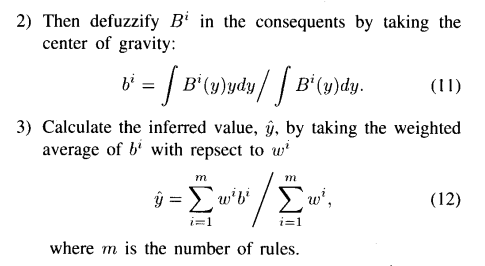

In [83]:
b10 = (c0_y1(interval) * interval).sum()  / c0_y1(interval).sum()
b11 = (c1_y1(interval) * interval).sum()  / c1_y1(interval).sum()
b12 = (c2_y1(interval) * interval).sum()  / c2_y1(interval).sum()
y_hat2 = np.zeros(len(y2))
for t in range(len(x21)):
    mu0_x11 = c0_x11(np.array([x21[t]])).squeeze()
    mu1_x11 = c1_x11(np.array([x21[t]])).squeeze()
    mu2_x11 = c2_x11(np.array([x21[t]])).squeeze()
    y_hat2[t] = (mu0_x11 * b10 + mu1_x11 * b11 + mu2_x11 * b12) / (mu0_x11 + mu1_x11 + mu2_x11)
e1 = ((y2 - y_hat2)**2).sum() / len(y2)

b20 = (c0_y2(interval) * interval).sum()  / c0_y2(interval).sum()
b21 = (c1_y2(interval) * interval).sum()  / c1_y2(interval).sum()
b22 = (c2_y2(interval) * interval).sum()  / c2_y2(interval).sum()
y_hat1 = np.zeros(len(y1))
for t in range(len(x11)):
    mu0_x21 = c0_x21(np.array([x11[t]])).squeeze()
    mu1_x21 = c1_x21(np.array([x11[t]])).squeeze()
    mu2_x21 = c2_x21(np.array([x11[t]])).squeeze()
    y_hat1[t] = (mu0_x21 * b20 + mu1_x21 * b21 + mu2_x21 * b22) / (mu0_x21 + mu1_x21 + mu2_x21)
e2 = ((y1 - y_hat1)**2).sum() / len(y1)

### The error criterion in GMDH is stated as follows in the original paper:

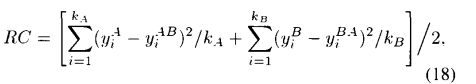

In [84]:
RC1 = (e1 + e2) / 2
print(f'Error for x1 is: {RC1:.2f}')

Error for x1 is: 1.05


### x2:

In [85]:
y_hat2 = np.zeros(len(y2))
for t in range(len(x22)):
    mu0_x12 = c0_x12(np.array([x22[t]])).squeeze()
    mu1_x12 = c1_x12(np.array([x22[t]])).squeeze()
    mu2_x12 = c2_x12(np.array([x22[t]])).squeeze()
    y_hat2[t] = (mu0_x12 * b10 + mu1_x12 * b11 + mu2_x12 * b12) / (mu0_x12 + mu1_x12 + mu2_x12)
e1 = ((y2 - y_hat2)**2).sum() / len(y2)

y_hat1 = np.zeros(len(y1))
for t in range(len(x12)):
    mu0_x22 = c0_x22(np.array([x12[t]])).squeeze()
    mu1_x22 = c1_x22(np.array([x12[t]])).squeeze()
    mu2_x22 = c2_x22(np.array([x12[t]])).squeeze()
    y_hat1[t] = (mu0_x22 * b20 + mu1_x22 * b21 + mu2_x22 * b22) / (mu0_x22 + mu1_x22 + mu2_x22)
e2 = ((y1 - y_hat1)**2).sum() / len(y1)

RC2 = (e1 + e2) / 2
print(f'Error for x1 is: {RC2:.2f}')

Error for x1 is: 1.16


### x3:

In [86]:
y_hat2 = np.zeros(len(y2))
for t in range(len(x23)):
    mu0_x13 = c0_x13(np.array([x23[t]])).squeeze()
    mu1_x13 = c1_x13(np.array([x23[t]])).squeeze()
    mu2_x13 = c2_x13(np.array([x23[t]])).squeeze()
    y_hat2[t] = (mu0_x13 * b10 + mu1_x13 * b11 + mu2_x13 * b12) / (mu0_x13 + mu1_x13 + mu2_x13)
e1 = ((y2 - y_hat2)**2).sum() / len(y2)

y_hat1 = np.zeros(len(y1))
for t in range(len(x13)):
    mu0_x23 = c0_x23(np.array([x13[t]])).squeeze()
    mu1_x23 = c1_x23(np.array([x13[t]])).squeeze()
    mu2_x23 = c2_x23(np.array([x13[t]])).squeeze()
    y_hat1[t] = (mu0_x23 * b20 + mu1_x23 * b21 + mu2_x23 * b22) / (mu0_x23 + mu1_x23 + mu2_x23)
e2 = ((y1 - y_hat1)**2).sum() / len(y1)

RC3 = (e1 + e2) / 2
print(f'Error for x1 is: {RC3:.2f}')

Error for x1 is: 1.08


### x4:

In [87]:
y_hat2 = np.zeros(len(y2))
for t in range(len(x24)):
    mu0_x14 = c0_x13(np.array([x24[t]])).squeeze()
    mu1_x14 = c1_x13(np.array([x24[t]])).squeeze()
    mu2_x14 = c2_x13(np.array([x24[t]])).squeeze()
    y_hat2[t] = (mu0_x14 * b10 + mu1_x14 * b11 + mu2_x14 * b12) / (mu0_x14 + mu1_x14 + mu2_x14)
e1 = ((y2 - y_hat2)**2).sum() / len(y2)

y_hat1 = np.zeros(len(y1))
for t in range(len(x14)):
    mu0_x24 = c0_x24(np.array([x14[t]])).squeeze()
    mu1_x24 = c1_x24(np.array([x14[t]])).squeeze()
    mu2_x24 = c2_x24(np.array([x14[t]])).squeeze()
    y_hat1[t] = (mu0_x24 * b20 + mu1_x24 * b21 + mu2_x24 * b22) / (mu0_x24 + mu1_x24 + mu2_x24)
e2 = ((y1 - y_hat1)**2).sum() / len(y1)

RC4 = (e1 + e2) / 2
print(f'Error for x1 is: {RC4:.2f}')

Error for x1 is: 1.07


### Unfortunately, Sugeno Yasukawa  model is not accurate enough. But, this issue does not surprise us because it was also said in the class that this method has little accuracy for systems that have drastic changes in it. Considering that the sinc function around the origin behaves like so, it confirms this issue.
### So Takagi-Sugeno model is more accurate than the Sugeno-Yasukawa.

### Now lets see the final model:

In [93]:
fcm = FCM(n_clusters = c)
fcm.fit(y[:, None])
c0 = (abs(fcm.centers) < 0.8).argmax()
c1 = (fcm.centers > 0.8).argmax()
c2 = (fcm.centers < -0.8).argmax()
fcm_centers = fcm.centers[[c0, c1, c2]]
fcm_mu = fcm.u[:, [c0, c1, c2]]

# c1:
p, _ = curve_fit(Gaussian, y, fcm_mu[:,0])
def c0_y(x, a = p[0], b = p[1], c = p[2], d=p[3]):
    mu = Gaussian(x, a, b, c, d)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

# c2:
p, _ = curve_fit(sigmoid, y, fcm_mu[:,1])
def c1_y(x, a = p[0], b = p[1], c = p[2]):
    mu = sigmoid(x, a, b, c)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

# c3:
p, _ = curve_fit(sigmoid, y, fcm_mu[:,2])
def c2_y(x, a = p[0], b = p[1], c = p[2]):
    mu = sigmoid(x, a, b, c)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

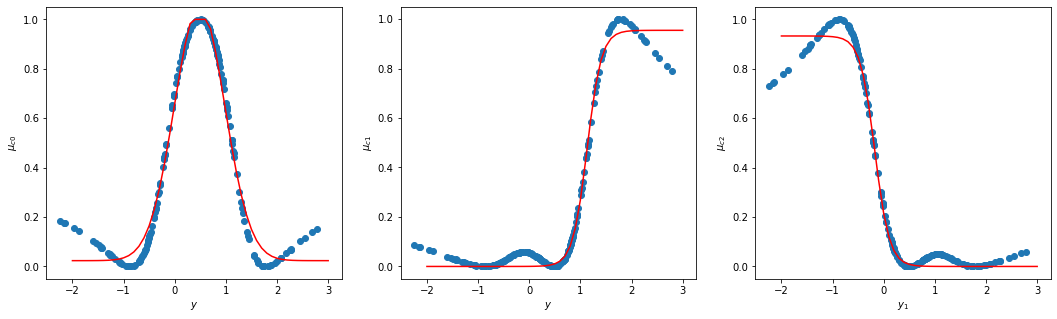

In [94]:
interval = np.arange(-2,3.1, 0.1)

plt.figure(figsize=[18,5])
plt.subplot(1,3,1)
plt.xlabel('$y$')
plt.ylabel('$\mu_{c0}$')
plt.scatter(y, fcm_mu[:,0])
plt.plot(interval, c0_y(interval), color='r')

plt.subplot(1,3,2)
plt.xlabel('$y$')
plt.ylabel('$\mu_{c1}$')
plt.scatter(y, fcm_mu[:,1])
plt.plot(interval, c1_y(interval), color='r')

plt.subplot(1,3,3)
plt.xlabel('$y_1$')
plt.ylabel('$\mu_{c2}$')
plt.scatter(y, fcm_mu[:,2])
plt.plot(interval, c2_y(interval), color='r')

In [97]:
p, _ = curve_fit(Gaussian, x1, fcm_mu[:,0])

def c0_x1(x, a = p[0], b = p[1], c = p[2], d=p[3]):
    mu = Gaussian(x, a, b, c, d)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

p, _ = curve_fit(Gaussian, x1, fcm_mu[:,1])

def c1_x1(x, a = p[0], b = p[1], c = p[2], d=p[3]):
    mu = Gaussian(x, a, b, c, d)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

p, _ = curve_fit(Gaussian, x1, fcm_mu[:,2])

def c2_x1(x, a = p[0], b = p[1], c = p[2], d=p[3]):
    mu = Gaussian(x, a, b, c, d)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

p, _ = curve_fit(Gaussian, x2, fcm_mu[:,0])

def c0_x2(x, a = p[0], b = p[1], c = p[2], d=p[3]):
    mu = Gaussian(x, a, b, c, d)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

p, _ = curve_fit(Gaussian, x2, fcm_mu[:,1])

def c1_x2(x, a = p[0], b = p[1], c = p[2], d=p[3]):
    mu = Gaussian(x, a, b, c, d)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

p, _ = curve_fit(Gaussian, x2, fcm_mu[:,2], p0=[1.5,0,0,-1.5])

def c2_x2(x, a = p[0], b = p[1], c = p[2], d=p[3]):
    mu = Gaussian(x, a, b, c, d)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

p, _ = curve_fit(Gaussian, x3, fcm_mu[:,0])

def c0_x3(x, a = p[0], b = p[1], c = p[2], d=p[3]):
    mu = Gaussian(x, a, b, c, d)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

p, _ = curve_fit(Gaussian, x3, fcm_mu[:,1])

def c1_x3(x, a = p[0], b = p[1], c = p[2], d=p[3]):
    mu = Gaussian(x, a, b, c, d)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

p, _ = curve_fit(Gaussian, x3, fcm_mu[:,2])

def c2_x3(x, a = p[0], b = p[1], c = p[2], d=p[3]):
    mu = Gaussian(x, a, b, c, d)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

p, _ = curve_fit(Gaussian, x4, fcm_mu[:,0], p0=[1, 0, 0, 0])

def c0_x4(x, a = p[0], b = p[1], c = p[2], d=p[3]):
    mu = Gaussian(x, a, b, c, d)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

p, _ = curve_fit(Gaussian, x4, fcm_mu[:,1], p0=[1.5,0,0,-1.5])

def c1_x4(x, a = p[0], b = p[1], c = p[2], d=p[3]):
    mu = Gaussian(x, a, b, c, d)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

p, _ = curve_fit(Gaussian, x4, fcm_mu[:,2])

def c2_x4(x, a = p[0], b = p[1], c = p[2], d=p[3]):
    mu = Gaussian(x, a, b, c, d)
    mu[mu > 1 ] = 1
    mu[mu < 0 ] = 0
    return mu

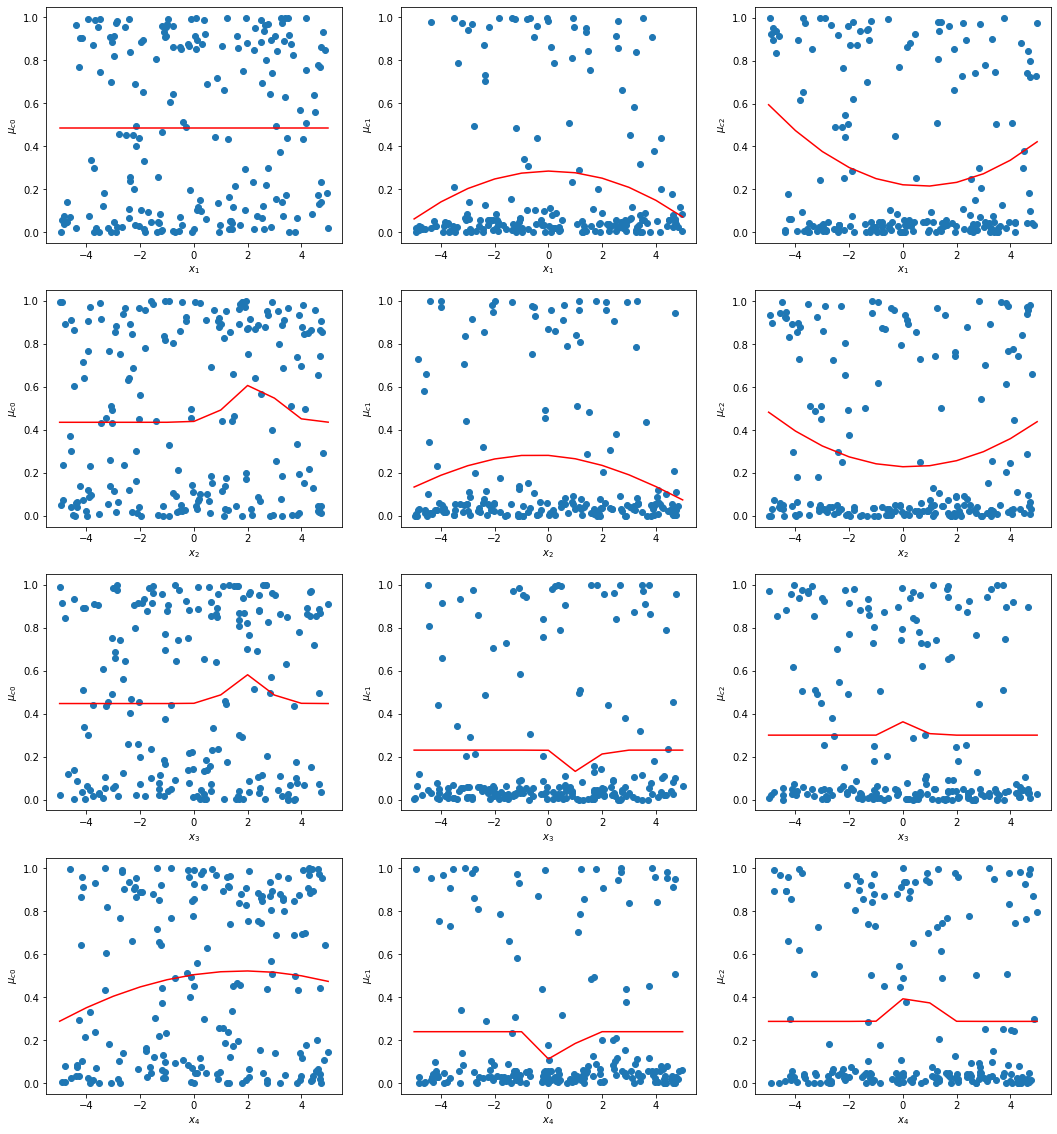

In [98]:
plt.figure(figsize=[18,20])

plt.subplot(4,3,1)
plt.xlabel('$x_{1}$')
plt.ylabel('$\mu_{c0}$')
plt.scatter(x1, fcm_mu[:,0])
plt.plot(np.arange(-5,6), c0_x1(np.arange(-5,6)), color='r')

plt.subplot(4,3,2)
plt.xlabel('$x_{1}$')
plt.ylabel('$\mu_{c1}$')
plt.scatter(x1, fcm_mu[:,1])
plt.plot(np.arange(-5,6), c1_x1(np.arange(-5,6)), color='r')

plt.subplot(4,3,3)
plt.xlabel('$x_{1}$')
plt.ylabel('$\mu_{c2}$')
plt.scatter(x1, fcm_mu[:,2])
plt.plot(np.arange(-5,6), c2_x1(np.arange(-5,6)), color='r')

plt.subplot(4,3,4)
plt.xlabel('$x_{2}$')
plt.ylabel('$\mu_{c0}$')
plt.scatter(x2, fcm_mu[:,0])
plt.plot(np.arange(-5,6), c0_x2(np.arange(-5,6)), color='r')

plt.subplot(4,3,5)
plt.xlabel('$x_{2}$')
plt.ylabel('$\mu_{c1}$')
plt.scatter(x2, fcm_mu[:,1])
plt.plot(np.arange(-5,6), c1_x2(np.arange(-5,6)), color='r')

plt.subplot(4,3,6)
plt.xlabel('$x_{2}$')
plt.ylabel('$\mu_{c2}$')
plt.scatter(x2, fcm_mu[:,2])
plt.plot(np.arange(-5,6), c2_x2(np.arange(-5,6)), color='r')

plt.subplot(4,3,7)
plt.xlabel('$x_{3}$')
plt.ylabel('$\mu_{c0}$')
plt.scatter(x3, fcm_mu[:,0])
plt.plot(np.arange(-5,6), c0_x3(np.arange(-5,6)), color='r')

plt.subplot(4,3,8)
plt.xlabel('$x_{3}$')
plt.ylabel('$\mu_{c1}$')
plt.scatter(x3, fcm_mu[:,1])
plt.plot(np.arange(-5,6), c1_x3(np.arange(-5,6)), color='r')

plt.subplot(4,3,9)
plt.xlabel('$x_{3}$')
plt.ylabel('$\mu_{c2}$')
plt.scatter(x3, fcm_mu[:,2])
plt.plot(np.arange(-5,6), c2_x3(np.arange(-5,6)), color='r')

plt.subplot(4,3,10)
plt.xlabel('$x_{4}$')
plt.ylabel('$\mu_{c0}$')
plt.scatter(x4, fcm_mu[:,0])
plt.plot(np.arange(-5,6), c0_x4(np.arange(-5,6)), color='r')

plt.subplot(4,3,11)
plt.xlabel('$x_{4}$')
plt.ylabel('$\mu_{c1}$')
plt.scatter(x4, fcm_mu[:,1])
plt.plot(np.arange(-5,6), c1_x4(np.arange(-5,6)), color='r')

plt.subplot(4,3,12)
plt.xlabel('$x_{4}$')
plt.ylabel('$\mu_{c2}$')
plt.scatter(x4, fcm_mu[:,2])
plt.plot(np.arange(-5,6), c2_x4(np.arange(-5,6)), color='r')

### The interesting point here is that the membership function of the dummy inputs has obtained non-Gaussian shapes and their confidence level is lower than the original inputs!

### x2-x1:

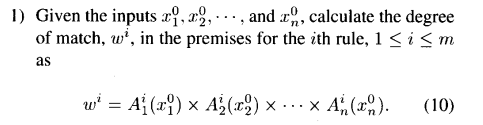



In [99]:
b0 = (c0_y(interval) * interval).sum()  / c0_y(interval).sum()
b1 = (c1_y(interval) * interval).sum()  / c1_y(interval).sum()
b2 = (c2_y(interval) * interval).sum()  / c2_y(interval).sum()
y_hat = np.zeros(m)
for t in range(m):
    mu0_x1 = c0_x1(np.array([x1[t]])).squeeze()
    mu1_x1 = c1_x1(np.array([x1[t]])).squeeze()
    mu2_x1 = c2_x1(np.array([x1[t]])).squeeze()
    mu0_x2 = c0_x2(np.array([x2[t]])).squeeze()
    mu1_x2 = c1_x2(np.array([x2[t]])).squeeze()
    mu2_x2 = c2_x2(np.array([x2[t]])).squeeze()
    mu0 = mu0_x1 * mu0_x2
    mu1 = mu1_x1 * mu1_x2
    mu2 = mu2_x1 * mu2_x2
    y_hat[t] = (mu0 * b0 + mu1 * b1 + mu2 * b2) / (mu0 + mu1 + mu2)
e = ((y - y_hat)**2).sum() / m
print(f'Error for x2-x1 is: {e:.2f}')

Error for x2-x1 is: 0.94


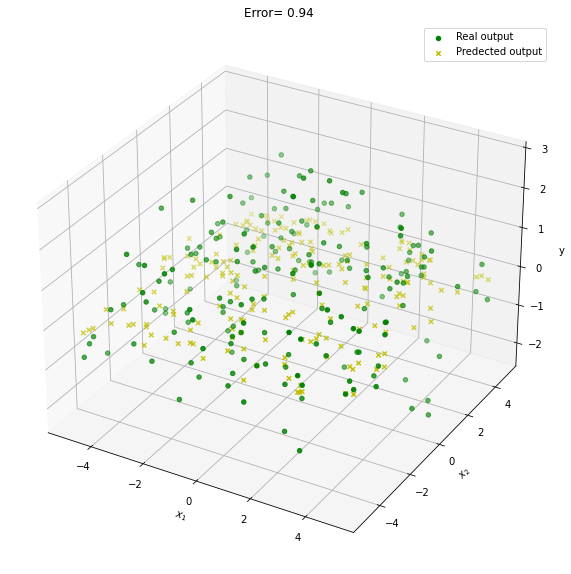

In [100]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter (x1, x2, y, c='g', marker='o')
ax.scatter (x1, x2, y_hat, c='y', marker='x')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('y')
ax.set_title(f'Error= {e:.2f}')
plt.legend(['Real output','Predected output'])

## As a result, the error in Sugeno-Yasukawa for x2-x1 model is 0.94 which is much higher than Takagi-Sugeno model. (Recall that the error for the Takagi-Sugeno model was 0.06.¶
## So the Takagi-Sugeno model is more accurate than the Sugeno-Yasukawa.